In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/kc_house_data.csv')

In [5]:
df['sqft_ratio'] = df['sqft_living'] / df['sqft_lot']

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_ratio
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0.208850
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0.354874
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0.077000
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0.392000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0.207921


<Axes: xlabel='bedrooms', ylabel='price'>

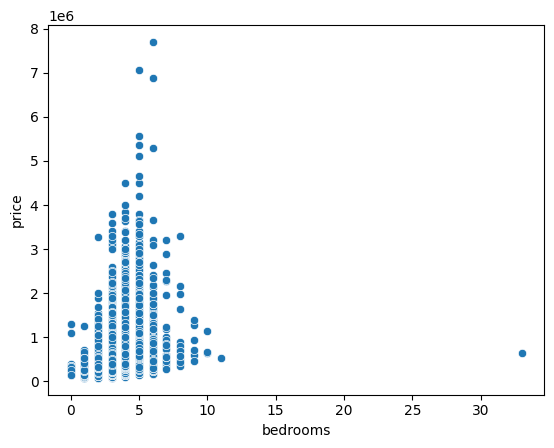

In [9]:
sns.scatterplot(x='bedrooms',y='price', data=df)

<Axes: xlabel='sqft_living', ylabel='price'>

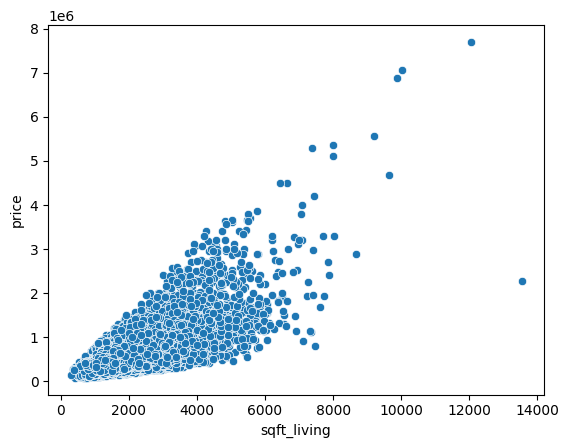

In [10]:
sns.scatterplot(x='sqft_living',y='price', data=df)

<Axes: xlabel='sqft_ratio', ylabel='price'>

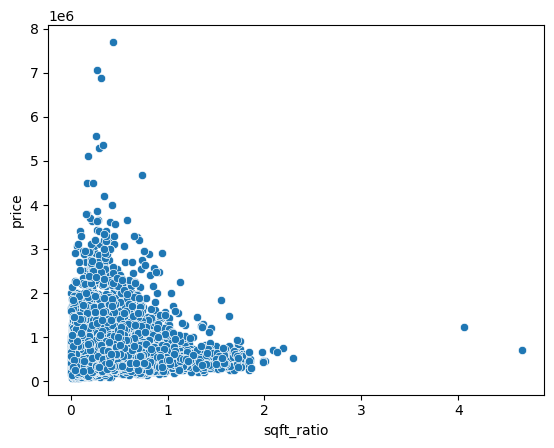

In [11]:
sns.scatterplot(x='sqft_ratio', y='price', data=df)

<Axes: xlabel='lat', ylabel='price'>

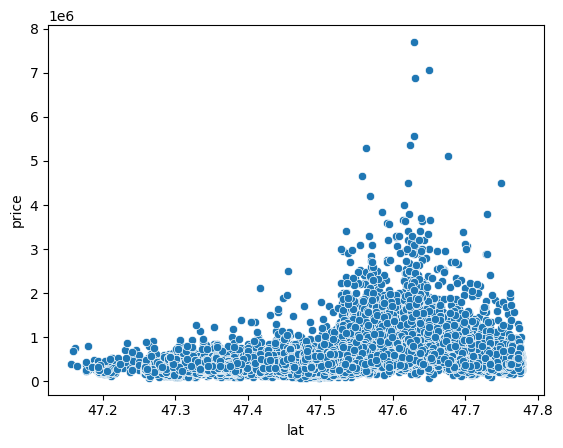

In [13]:
sns.scatterplot(x='lat', y= 'price', data=df)

<Axes: xlabel='long', ylabel='price'>

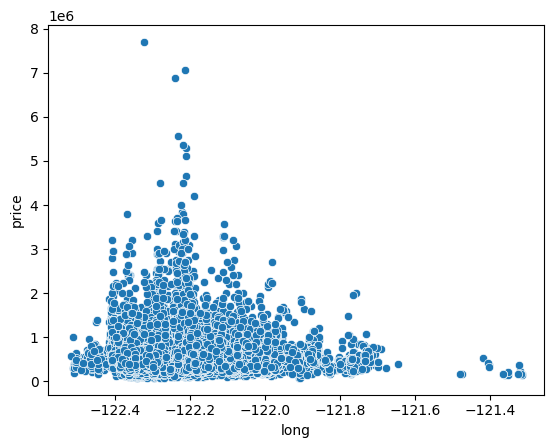

In [15]:
sns.scatterplot(x='long', y= 'price', data=df)

In [19]:
len(df['zipcode'].unique())

70

In [21]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_ratio'],
      dtype='object')

In [24]:
y = 'price'
num_columns = ['yr_built','yr_renovated','sqft_living','sqft_lot','sqft_above','sqft_basement', 'lat','long']
categorical = ['waterfront','view','condition','grade','bedrooms','bathrooms','floors','zipcode']

In [27]:
dummies = pd.get_dummies(data=df, columns=categorical, dtype=int)

In [32]:
df2 = dummies.copy()

In [33]:
df2.drop(['id','date'],axis=1,inplace=True)

In [34]:
df2.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,1180,5650,1180,0,1955,0,47.5112,-122.257,1340,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,2570,7242,2170,400,1951,1991,47.7210,-122.319,1690,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,770,10000,770,0,1933,0,47.7379,-122.233,2720,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,1960,5000,1050,910,1965,0,47.5208,-122.393,1360,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,1680,8080,1680,0,1987,0,47.6168,-122.045,1800,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# specify our X and Y variables

Y = df2['price']
X = df2.iloc[:,1:]

In [37]:
Y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [38]:
model = sm.OLS(Y,X).fit()

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     799.3
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:10:44   Log-Likelihood:            -2.8755e+05
No. Observations:               21613   AIC:                         5.754e+05
Df Residuals:                   21467   BIC:                         5.765e+05
Df Model:                         145                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
sqft_living       89.6992      1.746     51.380      0.000      86.277      93.121
sqft_lot           0.2196      0.035      6.256      0.000       0.151       0.288
sqft_above        62.8129      1.867     33.652      0.000      59.154      66.472
sqft_basement     26.8867      2.077     12.946      0.000      22.816      30.957
yr_built         137.6512     67.958      2.026      0.043       4.448     270.854
yr_renovated      32.0315      2.710     11.819      0.000      26.719      37.344
lat             2.317e+05   5.76e+04      4.025      0.000    1.19e+05    3.45e+05
long           -2.219e+05   4.15e+04     -5.343      0.000   -3.03e+05   -1.41e+05
sqft_living15     20.6429      2.694      7.662      0.000      15.362      25.924
sqft_lot15        -0.2440      0.055     -4.404      0.000      -0.353      -0.135
sqft_ratio     -6.856e+04   6346.971    -10.802      0.000    -8.1e+04   -5.61e+04
waterfront_0   -1.495e+07    2.2e+06     -6.801      0.000   -1.93e+07   -1.06e+07
waterfront_1   -1.438e+07    2.2e+06     -6.538      0.000   -1.87e+07   -1.01e+07
view_0         -5.981e+06   8.79e+05     -6.800      0.000    -7.7e+06   -4.26e+06
view_1         -5.895e+06    8.8e+05     -6.702      0.000   -7.62e+06   -4.17e+06
view_2         -5.913e+06   8.79e+05     -6.723      0.000   -7.64e+06   -4.19e+06
view_3         -5.838e+06   8.79e+05     -6.638      0.000   -7.56e+06   -4.11e+06
view_4         -5.705e+06    8.8e+05     -6.486      0.000   -7.43e+06   -3.98e+06
condition_1    -5.963e+06    8.8e+05     -6.778      0.000   -7.69e+06   -4.24e+06
condition_2    -5.874e+06    8.8e+05     -6.678      0.000    -7.6e+06   -4.15e+06
condition_3    -5.865e+06    8.8e+05     -6.669      0.000   -7.59e+06   -4.14e+06
condition_4     -5.84e+06   8.79e+05     -6.640      0.000   -7.56e+06   -4.12e+06
condition_5    -5.789e+06   8.79e+05     -6.583      0.000   -7.51e+06   -4.07e+06
grade_1        -2.611e+06   3.94e+05     -6.631      0.000   -3.38e+06   -1.84e+06
grade_3         -2.58e+06   3.78e+05     -6.832      0.000   -3.32e+06   -1.84e+06
grade_4        -2.657e+06   3.68e+05     -7.226      0.000   -3.38e+06   -1.94e+06
grade_5        -2.717e+06   3.67e+05     -7.412      0.000   -3.44e+06      -2e+06
grade_6        -2.728e+06   3.67e+05     -7.436      0.000   -3.45e+06   -2.01e+06
grade_7        -2.718e+06   3.67e+05     -7.408      0.000   -3.44e+06      -2e+06
grade_8        -2.687e+06   3.67e+05     -7.323      0.000   -3.41e+06   -1.97e+06
grade_9        -2.613e+06   3.67e+05     -7.121      0.000   -3.33e+06   -1.89e+06
grade_10       -2.501e+06   3.67e+05     -6.815      0.000   -3.22e+06   -1.78e+06
grade_11       -2.329e+06   3.67e+05     -6.344      0.000   -3.05e+06   -1.61e+06
grade_12       -1.987e+06   3.67e+05     -5.413      0.000   -2.71e+06   -1.27e+06
grade_13    

In [41]:
df3 = df2.copy()

In [45]:
df3.iloc[:,:15].corr()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,sqft_ratio,waterfront_0,waterfront_1,view_0
price,1.000000,0.702035,0.089661,0.605567,0.323816,0.054012,0.126434,0.307003,0.021626,0.585379,0.082447,0.123115,-0.266369,0.266369,-0.359120
sqft_living,0.702035,1.000000,0.172826,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223,0.756420,0.183286,0.077223,-0.103818,0.103818,-0.270907
sqft_lot,0.089661,0.172826,1.000000,0.183512,0.015286,0.053080,0.007644,-0.085683,0.229521,0.144608,0.718557,-0.252697,-0.021604,0.021604,-0.067847
sqft_above,0.605567,0.876597,0.183512,1.000000,-0.051943,0.423898,0.023285,-0.000816,0.343803,0.731870,0.194050,0.051908,-0.072075,0.072075,-0.153325
sqft_basement,0.323816,0.435043,0.015286,-0.051943,1.000000,-0.133124,0.071323,0.110538,-0.144765,0.200355,0.017276,0.063132,-0.080588,0.080588,-0.275310
yr_built,0.054012,0.318049,0.053080,0.423898,-0.133124,1.000000,-0.224874,-0.148122,0.409356,0.326229,0.070958,0.279186,0.026161,-0.026161,0.062810
yr_renovated,0.126434,0.055363,0.007644,0.023285,0.071323,-0.224874,1.000000,0.029398,-0.068372,-0.002673,0.007854,-0.003397,-0.092885,0.092885,-0.095029
lat,0.307003,0.052529,-0.085683,-0.000816,0.110538,-0.148122,0.029398,1.000000,-0.135512,0.048858,-0.086419,0.164945,0.014274,-0.014274,-0.009529
long,0.021626,0.240223,0.229521,0.343803,-0.144765,0.409356,-0.068372,-0.135512,1.000000,0.334605,0.254451,-0.204375,0.041910,-0.041910,0.088244
sqft_living15,0.585379,0.756420,0.144608,0.731870,0.200355,0.326229,-0.002673,0.048858,0.334605,1.000000,0.183192,-0.042132,-0.086463,0.086463,-0.273444


In [ ]:
df3.drop(['sqft_above','sqft_basement','sqft_ratio','yr_built','sqft_living15','sqft_lot15'], axis=1, inplace=True)

In [52]:
print(df3['lat'].min(), df3['lat'].max())

47.1559 47.7776


In [53]:
print(df3['long'].min(), df3['long'].max())

-122.519 -121.315


In [55]:
df3.drop(['lat', 'long'], axis=1, inplace=True)

In [56]:
# specify our X and Y variables

Y = df3['price']
X = df3.iloc[:,1:]

In [57]:
model = sm.OLS(Y,X).fit()

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     820.6
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:41:49   Log-Likelihood:            -2.8776e+05
No. Observations:               21613   AIC:                         5.758e+05
Df Residuals:                   21474   BIC:                         5.769e+05
Df Model:                         138                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
sqft_living      144.8855      2.437     59.460      0.000     140.109     149.662
sqft_lot           0.1875      0.027      6.999      0.000       0.135       0.240
yr_renovated      30.7563      2.573     11.951      0.000      25.712      35.801
waterfront_0    1.172e+05   1.27e+04      9.203      0.000    9.23e+04    1.42e+05
waterfront_1    6.966e+05   1.54e+04     45.165      0.000    6.66e+05    7.27e+05
view_0          4.728e+04   5897.308      8.017      0.000    3.57e+04    5.88e+04
view_1          1.368e+05   8849.422     15.453      0.000    1.19e+05    1.54e+05
view_2          1.176e+05   6947.402     16.927      0.000    1.04e+05    1.31e+05
view_3          1.896e+05   7812.658     24.267      0.000    1.74e+05    2.05e+05
view_4          3.226e+05   9435.169     34.187      0.000    3.04e+05    3.41e+05
condition_1     7.734e+04   2.31e+04      3.343      0.001     3.2e+04    1.23e+05
condition_2      1.55e+05   1.16e+04     13.321      0.000    1.32e+05    1.78e+05
condition_3     1.613e+05   7369.348     21.886      0.000    1.47e+05    1.76e+05
condition_4     1.866e+05   7480.872     24.948      0.000    1.72e+05    2.01e+05
condition_5     2.335e+05   7868.399     29.676      0.000    2.18e+05    2.49e+05
grade_1        -1.311e+05   1.47e+05     -0.890      0.373    -4.2e+05    1.58e+05
grade_3        -8.476e+04   8.97e+04     -0.945      0.345   -2.61e+05     9.1e+04
grade_4        -1.644e+05   3.13e+04     -5.256      0.000   -2.26e+05   -1.03e+05
grade_5        -2.266e+05   1.85e+04    -12.242      0.000   -2.63e+05    -1.9e+05
grade_6        -2.321e+05   1.67e+04    -13.915      0.000   -2.65e+05   -1.99e+05
grade_7        -2.211e+05   1.64e+04    -13.477      0.000   -2.53e+05   -1.89e+05
grade_8         -1.85e+05   1.64e+04    -11.267      0.000   -2.17e+05   -1.53e+05
grade_9         -9.79e+04   1.66e+04     -5.899      0.000    -1.3e+05   -6.54e+04
grade_10        2.641e+04    1.7e+04      1.553      0.120   -6918.927    5.97e+04
grade_11        2.128e+05   1.81e+04     11.743      0.000    1.77e+05    2.48e+05
grade_12        5.674e+05   2.26e+04     25.118      0.000    5.23e+05    6.12e+05
grade_13         1.35e+06   4.58e+04     29.473      0.000    1.26e+06    1.44e+06
bedrooms_0      1.311e+05    5.4e+04      2.426      0.015    2.52e+04    2.37e+05
bedrooms_1       1.21e+05   2.07e+04      5.842      0.000    8.04e+04    1.62e+05
bedrooms_2      1.295e+05   1.83e+04      7.074      0.000    9.36e+04    1.65e+05
bedrooms_3      1.395e+05   1.81e+04      7.703      0.000    1.04e+05    1.75e+05
bedrooms_4       1.27e+05   1.81e+04      7.009      0.000    9.15e+04    1.62e+05
bedrooms_5      1.112e+05   1.83e+04      6.063      0.000    7.52e+04    1.47e+05
bedrooms_6      7.532e+04   1.98e+04      3.802      0.000    3.65e+04    1.14e+05
bedrooms_7  

In [59]:
Y_pred = model.predict(X)

In [62]:
X

,sqft_living,sqft_lot,yr_renovated,waterfront_0,waterfront_1,view_0,view_1,view_2,view_3,view_4,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1180,5650,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2570,7242,1991,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,770,10000,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1960,5000,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1680,8080,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1530,1131,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21609,2310,5813,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21610,1020,1350,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21611,1600,2388,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
Y_pred

0        184823.310272
1        610699.872117
2        212289.775297
3        573240.067484
4        433894.375922
             ...      
21608    506928.846449
21609    416942.376397
21610    358263.678396
21611    398505.834591
21612    358212.295632
Length: 21613, dtype: float64

In [61]:
Y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [72]:
np.sqrt(((221900-184823)**2)+((538000-610699.87)**2))


81608.67004808312

In [86]:
np.mean(np.sqrt((Y_pred - Y)**2))

87190.94159377087

In [87]:
np.mean(df3.price)

540088.1417665294

In [88]:
87190.94159377087/540088.1417665294

0.1614383557998242

In [89]:
# residual analysis

res = Y_pred - Y

In [90]:
res

0        -37076.689728
1         72699.872117
2         32289.775297
3        -30759.932516
4        -76105.624078
             ...      
21608    146928.846449
21609     16942.376397
21610    -43837.321604
21611     -1494.165409
21612     33212.295632
Length: 21613, dtype: float64

<Axes: xlabel='price'>

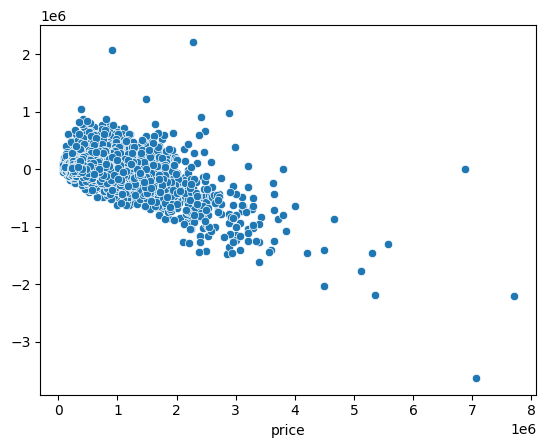

In [92]:
sns.scatterplot(x=df3.price, y=res)

<Axes: ylabel='Count'>

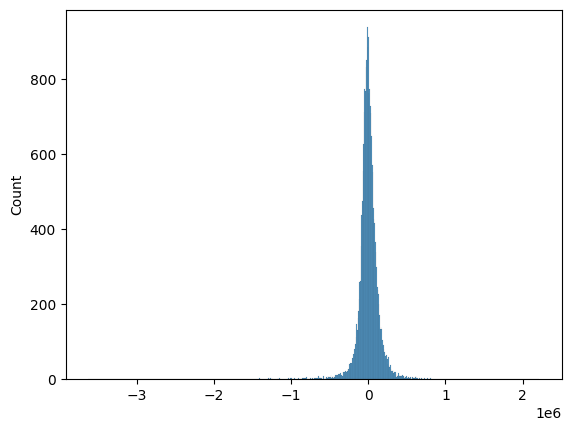

In [93]:
sns.histplot(res)